In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import os

In [25]:
#read all datframes 
df_orders = pd.read_csv('/Users/rodrigomateos/Desktop/Python Projects/instacart-data-analysis/instacart_orders (1).csv', sep=';')
df_products = pd.read_csv('/Users/rodrigomateos/Desktop/Python Projects/instacart-data-analysis/products.csv', sep=';')
df_aisles = pd.read_csv('/Users/rodrigomateos/Desktop/Python Projects/instacart-data-analysis/aisles.csv', sep=';')
df_departments = pd.read_csv('/Users/rodrigomateos/Desktop/Python Projects/instacart-data-analysis/departments.csv', sep=';')
df_order_products = pd.read_csv('//Users/rodrigomateos/Desktop/Python Projects/instacart-data-analysis/order_products.csv', sep=';')

## Understand data sets 

In [3]:
print(df_orders.head())
print(df_orders.info())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-nul

In [4]:
print(df_products.head())
print(df_products.info())

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
N

In [5]:
print(df_aisles.head())
print(df_aisles.info())

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [6]:
print(df_departments.head())
print(df_departments.info())

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None


In [7]:
print(df_order_products.head())
print(df_order_products.info())

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


## Clear Data

In [8]:
#drop duplicates 
print(df_orders.duplicated().sum())
df_orders.drop_duplicates(inplace=True)
df_orders.reset_index(drop=True, inplace=True)
print(df_orders.duplicated().sum())



15
0


In [9]:
#search more duplicates in the other data sets
print(df_products.duplicated().sum())
print(df_aisles.duplicated().sum())
print(df_departments.duplicated().sum())
print(df_order_products.duplicated().sum())

0
0
0
0


In [10]:
#null values 
df_products['product_name'].isna().sum()
df_products['product_name'] = df_products['product_name'].fillna('unknown')

df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999) #fill with 999
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int) #float to int
print(df_order_products.info()) #int



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None


## Data analysis 

In [11]:
df_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [12]:
#data analysis 
agg_dict = {'order_hour_of_day': ['min', 'max'], 'order_dow': ['min', 'max']}
print(df_orders.agg(agg_dict))

     order_hour_of_day  order_dow
min                  0          0
max                 23          6


### For each hour of the day, how many people place orders?

<Axes: title={'center': 'Orders Per Hour '}, xlabel='Hours of the day (24hr)', ylabel='Number of orders'>

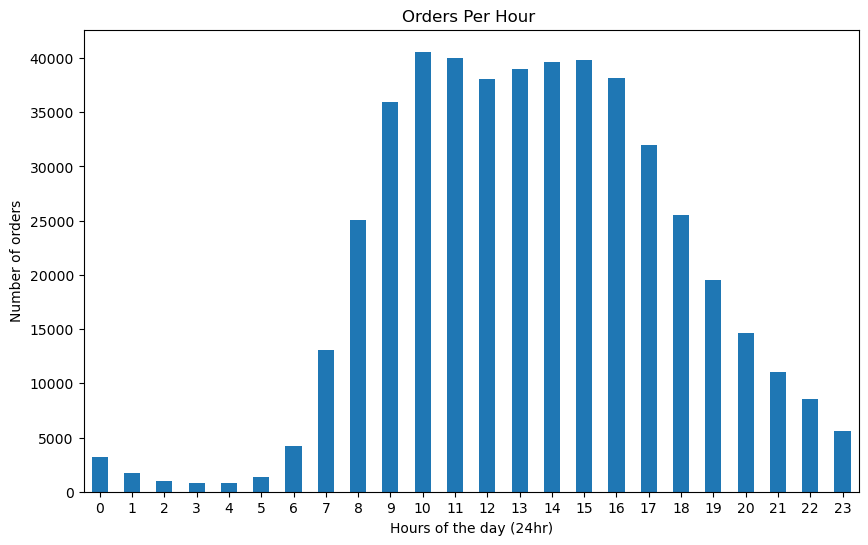

In [13]:
df_orders.groupby("order_hour_of_day")['order_id'].count().plot(x='order_hour_of_day',
                       y='order_id',
                       title = 'Orders Per Hour ',
                       xlabel="Hours of the day (24hr)",
                       ylabel="Number of orders",
                       kind="bar",
                       figsize=(10, 6),
                       rot=0)

There are more orders between 10 a.m. and 4 p.m.

### What day of the week do people buy groceries?

   order_dow  order_id
0     Sunday     84090
1     Monday     82185
2    Tuesday     65833
3  Wednesday     60897
4   Thursday     59810
5     Friday     63488
6   Saturday     62649


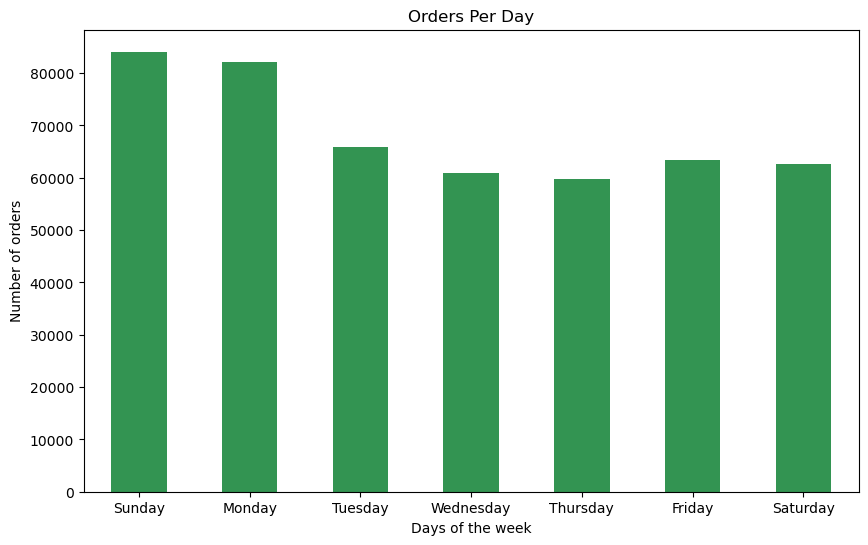

In [14]:
df_persons_orders_day=df_orders.groupby("order_dow")['order_id'].count()

df_persons_orders_day = df_persons_orders_day.reset_index()
day_names = {
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
}
# Rename days using the dictionary
df_persons_orders_day['order_dow'] = df_persons_orders_day['order_dow'].map(day_names)

df_persons_orders_day.plot(x="order_dow",
                           y="order_id",
                           xlabel="Days of the week",
                           ylabel="Number of orders",
                           title="Orders Per Day",
                           kind='bar',
                           figsize=(10,6),
                           rot=0,
                           color='#339452',
                           legend=False

)
print(df_persons_orders_day)

People usually do their shopping at the beginning of the week

### How long do people wait before placing another order? Discuss the minimum and maximum values.

The minimum time between orders is 0.0 days.
The maximum time between orders is 30.0 días.


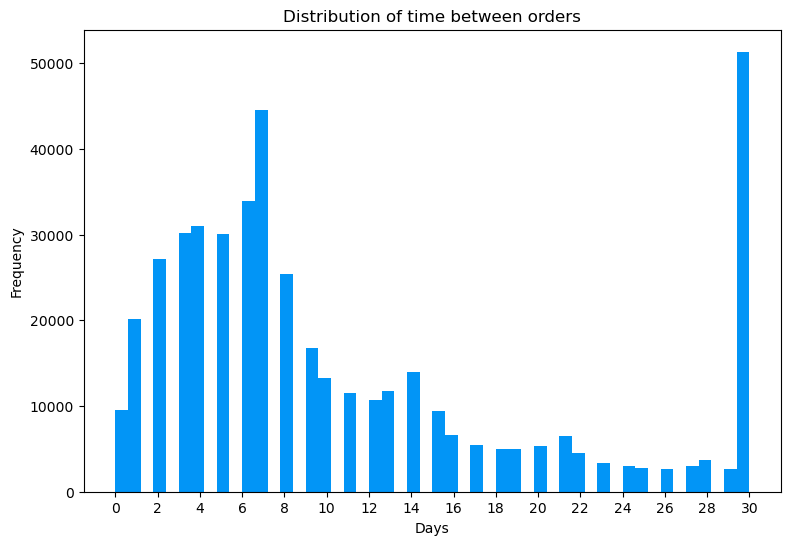

In [15]:
df_orders['days_since_prior_order'].plot(kind='hist',
                                        title="Distribution of time between orders",
                                        figsize=(9,6),
                                        xticks=range(0, int(df_orders['days_since_prior_order'].max()) + 1, 2),
                                        color="#0295f6",
                                        bins=50,
                                        xlabel='Days')
min_days = df_orders['days_since_prior_order'].min()
max_days = df_orders['days_since_prior_order'].max()
print(f"The minimum time between orders is {min_days} days.")
print(f"The maximum time between orders is {max_days} días.")

The average time for a person to reorder is 6-8 days and it seems that almost a month is when user orders also increase.


### Difference between Wednesdays and Saturdays

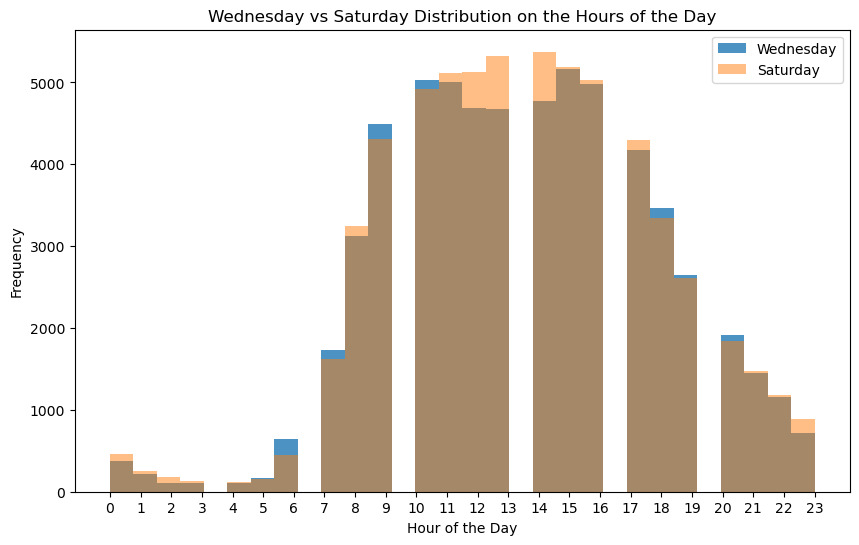

In [16]:
wednesday = df_orders[df_orders['order_dow']==3]['order_hour_of_day']
saturday = df_orders[df_orders['order_dow']==6]['order_hour_of_day']
plt.figure(figsize=(10, 6))
wednesday.plot(kind='hist', bins=30,alpha=0.8, ) 
saturday.plot(kind='hist', bins=30, alpha=0.5, )
plt.legend(['Wednesday', 'Saturday']) 
plt.xlabel('Hour of the Day') 
plt.title('Wednesday vs Saturday Distribution on the Hours of the Day') 
plt.xticks(range(0, 24, 1))
plt.show()

There is almost no difference between orders placed on Wednesday and Saturday in terms of hours.